This notebook generates the dataset for the step selection model.

In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import xarray as xr
#import pickle
import os
import glob
import utm
from pathlib import Path
import math
from math import dist
import cv2
import pandas as pd
from osgeo import gdal
import n2w
gdal.UseExceptions()

import stepselector.preprocessing_xarrays as pp

In [2]:
server_mount = '/home/blair/server/herd_hover'

In [3]:
# If obs_to_process = None, all of the raw track files in the data/raw_tracks folder will be processed
obs_to_process = None
#obs_to_process = ['ob019', 'ob027', 'ob028', 'ob034', 'ob036', 'ob044', 'ob053', 'ob066', 'ob074', 'ob083', 'ob088', 'ob090', 'ob108']

# Alternatively, a subset of observations can be processed
#obs_to_process = ['ob015', 'ob019', 'ob027', 'ob028', 'ob034', 'ob036', 'ob044', 'ob053', 'ob066', 'ob074', 'ob083', 'ob088', 'ob090', 'ob108']

# What step length to use?
step_length = 5
offsets = list(range(0, step_length))
dataset = n2w.convert(step_length) + '_meter_steps'

In [4]:
# Define directories
data_folder = os.path.join(server_mount, 'zebra_movement_data')
tracks_directory = os.path.join(data_folder, 'tracks_zarr_readyforviewsheds')
#dense_tracks_directory = os.path.join(data_folder, 'dense_tracks')
rasters_directory = os.path.join(data_folder, 'rasters')
#observed_steps_directory = os.path.join(data_folder, dataset, 'observed')
#simulated_steps_directory = os.path.join(data_folder, dataset, 'simulated')
viewshed_save_directory = os.path.join(data_folder, 'visual_fields')
map_directory = os.path.join(server_mount, '3D_mapping/big_maps')

In [6]:
# # Step 1 - interpolate tracks
# pp.write_dense_to_zarr_groups(
#     zarr_root = tracks_directory,
#     tolerance = 0.01,
#     obs_to_process = obs_to_process
# )

STEP 1: dense interpolation:   0%|          | 0/14 [00:00<?, ?it/s]

In [7]:
# # Step 2 - extract observed steps
# pp.extract_observed_steps_to_zarr(
#     step_length = step_length,
#     offsets = offsets,
#     zarr_root = tracks_directory,
#     dense_group = 'dense',
#     rasters_directory = rasters_directory,
#     obs_to_process = obs_to_process,
#     show_progress = True
# )

Step 2: observations:   0%|          | 0/14 [00:00<?, ?obs/s]

observation015: offsets:   0%|          | 0/5 [00:00<?, ?off/s]

observation015: tracks@0m:   0%|          | 0/16 [00:00<?, ?trk/s]

observation015: tracks@1m:   0%|          | 0/16 [00:00<?, ?trk/s]

observation015: tracks@2m:   0%|          | 0/16 [00:00<?, ?trk/s]

observation015: tracks@3m:   0%|          | 0/16 [00:00<?, ?trk/s]

observation015: tracks@4m:   0%|          | 0/16 [00:00<?, ?trk/s]

observation019: offsets:   0%|          | 0/5 [00:00<?, ?off/s]

observation019: tracks@0m:   0%|          | 0/77 [00:00<?, ?trk/s]

observation019: tracks@1m:   0%|          | 0/77 [00:00<?, ?trk/s]

observation019: tracks@2m:   0%|          | 0/77 [00:00<?, ?trk/s]

observation019: tracks@3m:   0%|          | 0/77 [00:00<?, ?trk/s]

observation019: tracks@4m:   0%|          | 0/77 [00:00<?, ?trk/s]

observation027: offsets:   0%|          | 0/5 [00:00<?, ?off/s]

observation027: tracks@0m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation027: tracks@1m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation027: tracks@2m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation027: tracks@3m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation027: tracks@4m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation028: offsets:   0%|          | 0/5 [00:00<?, ?off/s]

observation028: tracks@0m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation028: tracks@1m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation028: tracks@2m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation028: tracks@3m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation028: tracks@4m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation034: offsets:   0%|          | 0/5 [00:00<?, ?off/s]

observation034: tracks@0m:   0%|          | 0/96 [00:00<?, ?trk/s]

observation034: tracks@1m:   0%|          | 0/96 [00:00<?, ?trk/s]

observation034: tracks@2m:   0%|          | 0/96 [00:00<?, ?trk/s]

observation034: tracks@3m:   0%|          | 0/96 [00:00<?, ?trk/s]

observation034: tracks@4m:   0%|          | 0/96 [00:00<?, ?trk/s]

observation036: offsets:   0%|          | 0/5 [00:00<?, ?off/s]

observation036: tracks@0m:   0%|          | 0/13 [00:00<?, ?trk/s]

observation036: tracks@1m:   0%|          | 0/13 [00:00<?, ?trk/s]

observation036: tracks@2m:   0%|          | 0/13 [00:00<?, ?trk/s]

observation036: tracks@3m:   0%|          | 0/13 [00:00<?, ?trk/s]

observation036: tracks@4m:   0%|          | 0/13 [00:00<?, ?trk/s]

observation044: offsets:   0%|          | 0/5 [00:00<?, ?off/s]

observation044: tracks@0m:   0%|          | 0/23 [00:00<?, ?trk/s]

observation044: tracks@1m:   0%|          | 0/23 [00:00<?, ?trk/s]

observation044: tracks@2m:   0%|          | 0/23 [00:00<?, ?trk/s]

observation044: tracks@3m:   0%|          | 0/23 [00:00<?, ?trk/s]

observation044: tracks@4m:   0%|          | 0/23 [00:00<?, ?trk/s]

observation053: offsets:   0%|          | 0/5 [00:00<?, ?off/s]

observation053: tracks@0m:   0%|          | 0/20 [00:00<?, ?trk/s]

observation053: tracks@1m:   0%|          | 0/20 [00:00<?, ?trk/s]

observation053: tracks@2m:   0%|          | 0/20 [00:00<?, ?trk/s]

observation053: tracks@3m:   0%|          | 0/20 [00:00<?, ?trk/s]

observation053: tracks@4m:   0%|          | 0/20 [00:00<?, ?trk/s]

observation066: offsets:   0%|          | 0/5 [00:00<?, ?off/s]

observation066: tracks@0m:   0%|          | 0/25 [00:00<?, ?trk/s]

observation066: tracks@1m:   0%|          | 0/25 [00:00<?, ?trk/s]

observation066: tracks@2m:   0%|          | 0/25 [00:00<?, ?trk/s]

observation066: tracks@3m:   0%|          | 0/25 [00:00<?, ?trk/s]

observation066: tracks@4m:   0%|          | 0/25 [00:00<?, ?trk/s]

observation074: offsets:   0%|          | 0/5 [00:00<?, ?off/s]

observation074: tracks@0m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation074: tracks@1m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation074: tracks@2m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation074: tracks@3m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation074: tracks@4m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation083: offsets:   0%|          | 0/5 [00:00<?, ?off/s]

observation083: tracks@0m:   0%|          | 0/38 [00:00<?, ?trk/s]

observation083: tracks@1m:   0%|          | 0/38 [00:00<?, ?trk/s]

observation083: tracks@2m:   0%|          | 0/38 [00:00<?, ?trk/s]

observation083: tracks@3m:   0%|          | 0/38 [00:00<?, ?trk/s]

observation083: tracks@4m:   0%|          | 0/38 [00:00<?, ?trk/s]

observation088: offsets:   0%|          | 0/5 [00:00<?, ?off/s]

observation088: tracks@0m:   0%|          | 0/18 [00:00<?, ?trk/s]

observation088: tracks@1m:   0%|          | 0/18 [00:00<?, ?trk/s]

observation088: tracks@2m:   0%|          | 0/18 [00:00<?, ?trk/s]

observation088: tracks@3m:   0%|          | 0/18 [00:00<?, ?trk/s]

observation088: tracks@4m:   0%|          | 0/18 [00:00<?, ?trk/s]

observation090: offsets:   0%|          | 0/5 [00:00<?, ?off/s]

observation090: tracks@0m:   0%|          | 0/22 [00:00<?, ?trk/s]

observation090: tracks@1m:   0%|          | 0/22 [00:00<?, ?trk/s]

observation090: tracks@2m:   0%|          | 0/22 [00:00<?, ?trk/s]

observation090: tracks@3m:   0%|          | 0/22 [00:00<?, ?trk/s]

observation090: tracks@4m:   0%|          | 0/22 [00:00<?, ?trk/s]

observation108: offsets:   0%|          | 0/5 [00:00<?, ?off/s]

observation108: tracks@0m:   0%|          | 0/46 [00:00<?, ?trk/s]

observation108: tracks@1m:   0%|          | 0/46 [00:00<?, ?trk/s]

observation108: tracks@2m:   0%|          | 0/46 [00:00<?, ?trk/s]

observation108: tracks@3m:   0%|          | 0/46 [00:00<?, ?trk/s]

observation108: tracks@4m:   0%|          | 0/46 [00:00<?, ?trk/s]

In [8]:
# # Step 3 - simulate fake steps
# pp.simulate_reference_steps_to_zarr(
#     n_sim_per_step = 40,
#     step_length = step_length,
#     offsets = offsets,
#     zarr_root = tracks_directory,
#     rasters_directory = rasters_directory,
#     obs_to_process = obs_to_process,
#     angle_dist = 'uniform', # "uniform" or "observed". function also has the option to sample from observed angles pooled across trajectories, observations, or the whole dataset
#     observed_angle_pool = None, # ignored if angle_dist = "uniform". Can be "track", "observation", or "global"
#     show_progress = True
# )
    

Step 3: observations:   0%|          | 0/14 [00:00<?, ?obs/s]

observation015: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation015: tracks@0m:   0%|          | 0/16 [00:00<?, ?trk/s]

observation015: tracks@1m:   0%|          | 0/16 [00:00<?, ?trk/s]

observation015: tracks@2m:   0%|          | 0/16 [00:00<?, ?trk/s]

observation015: tracks@3m:   0%|          | 0/16 [00:00<?, ?trk/s]

observation015: tracks@4m:   0%|          | 0/16 [00:00<?, ?trk/s]

observation019: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation019: tracks@0m:   0%|          | 0/77 [00:00<?, ?trk/s]

observation019: tracks@1m:   0%|          | 0/77 [00:00<?, ?trk/s]

observation019: tracks@2m:   0%|          | 0/77 [00:00<?, ?trk/s]

observation019: tracks@3m:   0%|          | 0/77 [00:00<?, ?trk/s]

observation019: tracks@4m:   0%|          | 0/77 [00:00<?, ?trk/s]

observation027: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation027: tracks@0m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation027: tracks@1m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation027: tracks@2m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation027: tracks@3m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation027: tracks@4m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation028: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation028: tracks@0m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation028: tracks@1m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation028: tracks@2m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation028: tracks@3m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation028: tracks@4m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation034: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation034: tracks@0m:   0%|          | 0/96 [00:00<?, ?trk/s]

observation034: tracks@1m:   0%|          | 0/96 [00:00<?, ?trk/s]

observation034: tracks@2m:   0%|          | 0/96 [00:00<?, ?trk/s]

observation034: tracks@3m:   0%|          | 0/96 [00:00<?, ?trk/s]

observation034: tracks@4m:   0%|          | 0/96 [00:00<?, ?trk/s]

observation036: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation036: tracks@0m:   0%|          | 0/13 [00:00<?, ?trk/s]

observation036: tracks@1m:   0%|          | 0/13 [00:00<?, ?trk/s]

observation036: tracks@2m:   0%|          | 0/13 [00:00<?, ?trk/s]

observation036: tracks@3m:   0%|          | 0/13 [00:00<?, ?trk/s]

observation036: tracks@4m:   0%|          | 0/13 [00:00<?, ?trk/s]

observation044: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation044: tracks@0m:   0%|          | 0/23 [00:00<?, ?trk/s]

observation044: tracks@1m:   0%|          | 0/23 [00:00<?, ?trk/s]

observation044: tracks@2m:   0%|          | 0/23 [00:00<?, ?trk/s]

observation044: tracks@3m:   0%|          | 0/23 [00:00<?, ?trk/s]

observation044: tracks@4m:   0%|          | 0/23 [00:00<?, ?trk/s]

observation053: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation053: tracks@0m:   0%|          | 0/20 [00:00<?, ?trk/s]

observation053: tracks@1m:   0%|          | 0/20 [00:00<?, ?trk/s]

observation053: tracks@2m:   0%|          | 0/20 [00:00<?, ?trk/s]

observation053: tracks@3m:   0%|          | 0/20 [00:00<?, ?trk/s]

observation053: tracks@4m:   0%|          | 0/20 [00:00<?, ?trk/s]

observation066: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation066: tracks@0m:   0%|          | 0/25 [00:00<?, ?trk/s]

observation066: tracks@1m:   0%|          | 0/25 [00:00<?, ?trk/s]

observation066: tracks@2m:   0%|          | 0/25 [00:00<?, ?trk/s]

observation066: tracks@3m:   0%|          | 0/25 [00:00<?, ?trk/s]

observation066: tracks@4m:   0%|          | 0/25 [00:00<?, ?trk/s]

observation074: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation074: tracks@0m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation074: tracks@1m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation074: tracks@2m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation074: tracks@3m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation074: tracks@4m:   0%|          | 0/12 [00:00<?, ?trk/s]

observation083: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation083: tracks@0m:   0%|          | 0/38 [00:00<?, ?trk/s]

observation083: tracks@1m:   0%|          | 0/38 [00:00<?, ?trk/s]

observation083: tracks@2m:   0%|          | 0/38 [00:00<?, ?trk/s]

observation083: tracks@3m:   0%|          | 0/38 [00:00<?, ?trk/s]

observation083: tracks@4m:   0%|          | 0/38 [00:00<?, ?trk/s]

observation088: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation088: tracks@0m:   0%|          | 0/18 [00:00<?, ?trk/s]

observation088: tracks@1m:   0%|          | 0/18 [00:00<?, ?trk/s]

observation088: tracks@2m:   0%|          | 0/18 [00:00<?, ?trk/s]

observation088: tracks@3m:   0%|          | 0/18 [00:00<?, ?trk/s]

observation088: tracks@4m:   0%|          | 0/18 [00:00<?, ?trk/s]

observation090: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation090: tracks@0m:   0%|          | 0/22 [00:00<?, ?trk/s]

observation090: tracks@1m:   0%|          | 0/22 [00:00<?, ?trk/s]

observation090: tracks@2m:   0%|          | 0/22 [00:00<?, ?trk/s]

observation090: tracks@3m:   0%|          | 0/22 [00:00<?, ?trk/s]

observation090: tracks@4m:   0%|          | 0/22 [00:00<?, ?trk/s]

observation108: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation108: tracks@0m:   0%|          | 0/46 [00:00<?, ?trk/s]

observation108: tracks@1m:   0%|          | 0/46 [00:00<?, ?trk/s]

observation108: tracks@2m:   0%|          | 0/46 [00:00<?, ?trk/s]

observation108: tracks@3m:   0%|          | 0/46 [00:00<?, ?trk/s]

observation108: tracks@4m:   0%|          | 0/46 [00:00<?, ?trk/s]

In [9]:
# # Step 4 - get observer and step info
# pp.annotate_steps_with_observer_features(
#     step_length = step_length,
#     offsets = offsets,
#     zarr_root = tracks_directory,
#     obs_to_process = obs_to_process,
#     show_progress = True)
    

Step 4: observations:   0%|          | 0/14 [00:00<?, ?obs/s]

observation015: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation019: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation027: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation028: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation034: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation036: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation044: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation053: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation066: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation074: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation083: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation088: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation090: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation108: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
# # Step 5 - calculate zebra observation heights for visibility analyses
# pp.annotate_with_observer_height(
#     step_length = step_length,
#     offsets = offsets,
#     rasters_directory = rasters_directory,
#     zarr_root = tracks_directory,
#     obs_to_process = obs_to_process,
#     show_progress = True)

Step 5: observations:   0%|          | 0/14 [00:00<?, ?obs/s]

observation015: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation019: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation027: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation028: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation034: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation036: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation044: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation053: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation066: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation074: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation083: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation088: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation090: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation108: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

In [11]:
# # Step 6 - get step slope
# pp.annotate_with_ground_slope(
#     step_length = step_length,
#     offsets = offsets,
#     rasters_directory = rasters_directory,
#     zarr_root = tracks_directory,
#     obs_to_process = obs_to_process,
#     write_alt_components = True, # stores start/end/delta altitudes
#     show_progress = True
# )

Step 6: observations:   0%|          | 0/14 [00:00<?, ?obs/s]

observation015: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation019: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation027: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation028: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation034: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation036: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation044: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation053: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation066: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation074: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation083: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation088: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation090: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation108: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

In [12]:
# # Step 8 - get ground_cover
# pp.annotate_ground_cover(
#     step_length=step_length,
#     offsets=offsets,
#     rasters_directory=rasters_directory,
#     zarr_root=tracks_directory,
#     obs_to_process=obs_to_process,
#     show_progress=True
# )

Step 8: observations:   0%|          | 0/14 [00:00<?, ?obs/s]

observation015: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation019: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

/home/blair/fine-scale-movement/stepselector/untitled.py:1918: RuntimeWarning: invalid value encountered in cast
  codes = np.where(np.isfinite(vals), vals.astype(np.int16), -1).astype(np.int16)
/home/blair/fine-scale-movement/stepselector/untitled.py:1918: RuntimeWarning: invalid value encountered in cast
  codes = np.where(np.isfinite(vals), vals.astype(np.int16), -1).astype(np.int16)
/home/blair/fine-scale-movement/stepselector/untitled.py:1918: RuntimeWarning: invalid value encountered in cast
  codes = np.where(np.isfinite(vals), vals.astype(np.int16), -1).astype(np.int16)
/home/blair/fine-scale-movement/stepselector/untitled.py:1918: RuntimeWarning: invalid value encountered in cast
  codes = np.where(np.isfinite(vals), vals.astype(np.int16), -1).astype(np.int16)


observation027: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation028: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation034: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation036: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation044: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation053: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation066: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation074: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation083: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation088: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation090: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

observation108: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

In [12]:
# # Step 7 - get social info
# pp.annotate_social_features(
#     step_length = step_length,
#     offsets = offsets,
#     rasters_directory = rasters_directory,
#     zarr_root = tracks_directory,
#     obs_to_process = obs_to_process,
#     social_radius = 10,
#     compute_visibility = True,
#     visibility_max_range = None,
#     max_neighbors_los = None,
#     write_neighbor_table = True,
#     show_progress = True
# )

Step 7: observations:   0%|          | 0/1 [00:00<?, ?obs/s]

observation015: offsets:   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
df_preview = pp.preview_viewshed_io(
    step_length=5.0,
    offsets=[0.0],
    viewshed_save_directory=viewshed_save_directory,
    zarr_root=tracks_directory,
    obs_to_process=["observation015"],   # or ["ob015"] or None for all
    radius=30,
    dataset_tag=None,                    # defaults to steps_5m for simulated
    reuse_observed=True,
    reuse_simulated=False,
    limit_per_group=500,                 # raise/lower to taste
)

from IPython.display import display
#display(df_preview.head(20))

display(pp.summarize_viewshed_preview(df_preview))

df_sim = df_preview[df_preview["is_simulated"]].copy()
df_sim.tif_path[500]

,is_simulated,action,count
0,False,reuse,500
1,True,create,500


'/home/blair/server/herd_hover/zebra_movement_data/visual_fields/observation015/steps_5m/track000/simulated/offset_0m/observation015_track000_frame000359_rep0_viewshed30m.tif'

In [6]:
df_preview.tif_path[0]

'/home/blair/server/herd_hover/zebra_movement_data/visual_fields/observation015/track000/observed/observation015_track000_frame000000_viewshed30m.tif'

In [ ]:
# Step 10 - generate viewsheds and calculate visibility
pp.annotate_viewsheds(
    step_length=step_length,
    offsets=offsets,
    rasters_directory=rasters_directory,
    viewshed_save_directory=viewshed_save_directory,
    zarr_root=tracks_directory,
    obs_to_process=['ob015'],
    radius=30,
    threads=10,
    keep_observed=True,
    keep_simulated = False,
    reuse_observed=True,
    reuse_simulated=False,
    progress_mode="observation",
)

Step 10: observations:   0%|                             | 0/1 [00:00<?, ?obs/s]

observation015: viewsheds:   0%|                    | 0/370228 [00:00<?, ?pts/s]

In [ ]:
# Step 10 - generate viewsheds and calculate visibility
pp.annotate_viewsheds(
    step_length=step_length,
    offsets=offsets,
    rasters_directory=rasters_directory,
    viewshed_save_directory=viewshed_save_directory,
    zarr_root=tracks_directory,
    obs_to_process=['ob019'],
    radius=30,
    threads=10,
    keep_observed=True,
    keep_simulated = False,
    reuse_observed=True,
    reuse_simulated=False,
    progress_mode="observation",
)

In [27]:
pp.sanity_checks('/home/blair/server/herd_hover/zebra_movement_data/tracks_xarray/observation036.zarr', 5, 0, atol = 0.02)

[/home/blair/server/herd_hover/zebra_movement_data/tracks_xarray/observation036.zarr] checked steps: 2684
issues: {'frame_mismatch': 0, 'len_mismatch': 0, 'wrong_count': 0, 'nonfinite': 0}


{'frame_mismatch': 0, 'len_mismatch': 0, 'wrong_count': 0, 'nonfinite': 0}

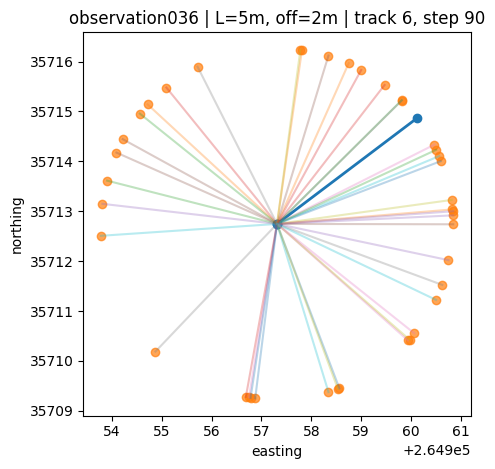

In [11]:
_ = pp.plot_step_with_refs(
    '/home/blair/server/herd_hover/zebra_movement_data/tracks_xarray/observation036.zarr',
    step_length=5.0,
    offset=2.0,
    track_i=6,
    step_j=90,
    k=40,
    shuffle=True,
)

In [ ]:
# # Step 1 - interpolate tracks
# pp.interpolate_raw_tracks(raw_tracks_directory = raw_tracks_directory,
#                           save_directory = dense_tracks_directory,
#                           tolerance = 0.01,
#                           obs_to_process = obs_to_process)

In [ ]:
# # Step 2 - extract observed steps
# pp.extract_observed_steps(step_length = step_length, 
#                           offsets = offsets,
#                           dense_tracks_directory = dense_tracks_directory,
#                           save_directory = observed_steps_directory,
#                           rasters_directory = rasters_directory,
#                           ob_metadata_file = ob_metadata_file, # change to ob_metadata_file if there's risk of observed steps falling outside mapped area
#                           obs_to_process = obs_to_process)

In [ ]:
# # Step 3 - simulate fake steps
# pp.simulate_fake_steps(n_steps = 40, 
#                     observed_steps_directory = observed_steps_directory, 
#                     save_directory = simulated_steps_directory, 
#                     rasters_directory = rasters_directory, 
#                     ob_metadata_file = ob_metadata_file, 
#                     obs_to_process = obs_to_process,
#                     sample_dist = 'uniform')

In [2]:
# set up file paths
server_mount = Path('/home/blair/server/herd_hover')
data_folder = Path(os.path.join(server_mount, 'zebra_movement_data'))
raw_tracks_directory = Path(os.path.join(data_folder, 'raw_tracks'))

# define metadata locations
ob_metadata_file = Path(os.path.join(data_folder, 'observation_metadata.csv'))
track_metadata_file = Path(os.path.join(data_folder, 'track_metadata.csv'))

# Where and how to save x-arrays
output_directory = Path(os.path.join(data_folder, 'tracks_xarray'))
write_format = 'zarr'
output_directory.mkdir(parents = True, exist_ok = True)

In [3]:
coord_names = ['easting', 'northing']
float_dtype = 'float32'
chunks = {'frame':8000, 'track': 16}

In [5]:
def read_metadata(track_csv: Path, obs_csv: Path) -> tuple[pd.DataFrame, pd.DataFrame]:
    tdf = pd.read_csv(track_csv, dtype={"observation": str})
    odf = pd.read_csv(obs_csv, dtype={"observation": str})
    tdf["observation"] = tdf["observation"].map(to_obsX)
    odf["observation"] = odf["observation"].map(to_obsX)

    # Clean booleans/None-like text
    if "scare" in odf:
        odf["scare"] = odf["scare"].astype(str).str.upper().map({"TRUE": True, "FALSE": False}).fillna(pd.NA)
    for col in ["scare_track", "scare_frame", "big_map", "site"]:
        if col in odf:
            odf[col] = odf[col].replace({"None": pd.NA, "nan": pd.NA})

    # Parse dates like "11/6/17" (month/day/year)
    if "date" in odf:
        odf["date"] = parse_date_col(odf["date"])

    return tdf, odf

def build_ds_for_file(npy_path: Path, tdf_all: pd.DataFrame, odf_all: pd.DataFrame) -> xr.Dataset:
    obsX, obX = from_filename(npy_path.name)

    arr = np.load(npy_path)
    if arr.ndim != 3 or arr.shape[2] != 2:
        raise ValueError(f"{npy_path}: expected (n, f, 2), got {arr.shape}")
    n, f, _ = arr.shape
    if float_dtype:
        arr = arr.astype(float_dtype, copy=False)

    # Per-track rows for this observation
    tdf = tdf_all.loc[tdf_all["observation"] == obsX].copy()
    if tdf.empty:
        warnings.warn(f"No track metadata for {obsX}; fabricating placeholders.")
        tdf = pd.DataFrame({
            "observation": [obsX]*n,
            "track": np.arange(n, dtype=int),
            "individual_ID": [f"{obX}-{'%03d'%i}" for i in range(n)],
            "species": pd.NA,
            "age": pd.NA,
        })
    else:
        # Your sample shows 0-based tracks already; keep as-is but sanity check
        minv, maxv = int(tdf["track"].min()), int(tdf["track"].max())
        if not (minv == 0 and maxv == n-1):
            warnings.warn(f"{obsX}: track indices span [{minv},{maxv}] for n={n}; rows outside [0,{n-1}] will be dropped.")
        tdf = tdf.loc[tdf["track"].between(0, n-1)].copy()
        # fill missing tracks if any
        missing = sorted(set(range(n)) - set(tdf["track"].tolist()))
        if missing:
            filler = pd.DataFrame({
                "observation": [obsX]*len(missing),
                "track": missing,
                "individual_ID": [f"{obX}-{'%03d'%i}" for i in missing],
                "species": pd.NA,
                "age": pd.NA,
            })
            tdf = pd.concat([tdf, filler], ignore_index=True)

    # Sort by track to match arr axis 0 and dedupe
    tdf = tdf.sort_values("track").drop_duplicates(subset=["track"], keep="first")
    tdf = tdf.iloc[:n]  # guard against extras

    # Track indices 0..n-1 already align to axis 0
    track_ix = tdf["track"].to_numpy(np.int32)
    
    # Optional readable labels, unique per track within this observation
    track_labels = [f"{obX}_track{int(i):03d}" for i in track_ix]
    
    # Per-track metadata (NO uniqueness enforced)
    individual_ids = tdf["individual_ID"].astype(str).tolist()
    species = tdf.get("species", pd.Series([pd.NA]*n)).astype("string").tolist()
    age     = tdf.get("age",     pd.Series([pd.NA]*n)).astype("string").tolist()

    # Per-observation attrs (first row wins if duplicates)
    odf = odf_all.loc[odf_all["observation"] == obsX]
    attrs = {"observation_id": obsX, "source_file": str(npy_path), "coord_names": coord_names, "units": "UTM meters"}
    if not odf.empty:
        row = odf.iloc[0].to_dict()
        row.pop("observation", None)
        # make attrs xarray-safe (plain Python scalars / None)
        clean = {}
        for k, v in row.items():
            if pd.isna(v):
                clean[k] = None
            elif hasattr(v, "item"):
                clean[k] = v.item()
            else:
                clean[k] = v
        attrs.update(clean)
        attrs = add_observer_utm(attrs)
    else:
        warnings.warn(f"No observation metadata for {obsX}.")

    # Build Dataset
    ds = xr.Dataset(
        data_vars={
            "position": (("track", "frame", "location"), arr),
        },
        coords={
            # Primary coordinate along the dimension (unique per track)
            "track": ("track", track_labels),          # or simply np.arange(n, dtype=np.int32)
            "track_index": ("track", track_ix),
            # Verbatim IDs from CSV, duplicates allowed
            "individual_ID": ("track", individual_ids),
            # Other per-track metadata
            "species": ("track", species),
            "age": ("track", age),
            # Frame/coord axes
            "frame": np.arange(f, dtype=np.int32),
            "location": coord_names,
        },
        attrs=attrs,
    )

    if chunks:
        ds = ds.chunk(chunks)

    return ds

def save_ds(ds: xr.Dataset, out_dir: Path, fmt: str) -> Path:
    out_dir.mkdir(parents=True, exist_ok=True)
    obs_id = ds.attrs.get("observation_id", "unknown_obs")
    if fmt.lower() == "zarr":
        out_path = out_dir / f"{obs_id}.zarr"
        try:
            import numcodecs
            comp = numcodecs.Blosc(cname="zstd", clevel=5, shuffle=numcodecs.Blosc.SHUFFLE)
            enc = {"position": {"compressor": comp}}
        except Exception:
            enc = {"position": {}}
    
        # --- sanitize attrs before writing ---
        ds = ds.copy()  # avoid mutating original dataset
        ds.attrs = sanitize_attrs(ds.attrs)
    
        # --- now safe to write ---
        ds.to_zarr(out_path, mode="w", encoding=enc)
        return out_path

    elif fmt.lower() == "netcdf":
        out_path = out_dir / f"{obs_id}.nc"
        enc = {"position": {"zlib": True, "complevel": 4}}
        ds.to_netcdf(out_path, engine="h5netcdf", encoding=enc)
    else:
        raise ValueError("write_format must be 'zarr' or 'netcdf'")
    return out_path

def main():
    track_df, obs_df = read_metadata(track_metadata_file, ob_metadata_file)
    npy_files = sorted(p for p in raw_tracks_directory.iterdir() if _re_npy.match(p.name))
    if not npy_files:
        raise SystemExit(f"No 'obXXX_utm_tracks.npy' files in {raw_tracks_directory}")

    print(f"Found {len(npy_files)} observations.")
    for p in npy_files:
        print(f"Processing {p.name} ...")
        ds = build_ds_for_file(p, track_df, obs_df)
        out = save_ds(ds, output_directory, write_format)
        print(f"  -> saved {out}")

if __name__ == "__main__":
    main()

Found 14 observations.
Processing ob015_utm_tracks.npy ...
  -> saved /home/blair/server/herd_hover/zebra_movement_data/tracks_xarray/observation015.zarr
Processing ob019_utm_tracks.npy ...
  -> saved /home/blair/server/herd_hover/zebra_movement_data/tracks_xarray/observation019.zarr
Processing ob027_utm_tracks.npy ...
  -> saved /home/blair/server/herd_hover/zebra_movement_data/tracks_xarray/observation027.zarr
Processing ob028_utm_tracks.npy ...
  -> saved /home/blair/server/herd_hover/zebra_movement_data/tracks_xarray/observation028.zarr
Processing ob034_utm_tracks.npy ...
  -> saved /home/blair/server/herd_hover/zebra_movement_data/tracks_xarray/observation034.zarr
Processing ob036_utm_tracks.npy ...
  -> saved /home/blair/server/herd_hover/zebra_movement_data/tracks_xarray/observation036.zarr
Processing ob044_utm_tracks.npy ...
  -> saved /home/blair/server/herd_hover/zebra_movement_data/tracks_xarray/observation044.zarr
Processing ob053_utm_tracks.npy ...
  -> saved /home/blair/s

In [6]:
ds = xr.open_zarr("/home/blair/server/herd_hover/zebra_movement_data/tracks_xarray/observation066.zarr")

In [7]:
ds

<xarray.Dataset> Size: 17MB
Dimensions:        (track: 25, frame: 81083, location: 2)
Coordinates:
    age            (track) <U5 500B dask.array<chunksize=(16,), meta=np.ndarray>
  * frame          (frame) int32 324kB 0 1 2 3 4 ... 81079 81080 81081 81082
    individual_ID  (track) <U7 700B dask.array<chunksize=(16,), meta=np.ndarray>
  * location       (location) <U8 64B 'easting' 'northing'
    species        (track) <U3 300B dask.array<chunksize=(16,), meta=np.ndarray>
  * track          (track) <U14 1kB 'ob066_track000' ... 'ob066_track024'
    track_index    (track) int32 100B dask.array<chunksize=(16,), meta=np.ndarray>
Data variables:
    position       (track, frame, location) float32 16MB dask.array<chunksize=(16, 8000, 2), meta=np.ndarray>
Attributes: (12/17)
    big_map:                   highdam6_7_8_merge_ob066
    coord_names:               ['easting', 'northing']
    date:                      2018-03-31T00:00:00
    observation_id:            observation066
    observer_easting:          264566.00681479916
    observer_lat:              0.313743121
    ...                        ...
    scare_frame:               61459.0
    scare_track:               None
    site:                      mpala
    source_file:               /home/blair/server/herd_hover/zebra_movement_d...
    units:                     UTM meters
    utm_zone:                  37N

In [36]:
print(ds.track_index.values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


In [30]:
species = ds.species.sel(track='ob066_track024').compute().item()
age = ds.age.isel(track=24).compute().item()
individual_ID = ds.individual_ID.sel(track='ob066_track024').compute().item()

In [31]:
print(species, age, individual_ID)

imp young 066-020


In [13]:
da=ds['position'].sel(track=ds.track[0])
print(da)

<xarray.DataArray 'position' (frame: 81083, location: 2)> Size: 649kB
dask.array<getitem, shape=(81083, 2), dtype=float32, chunksize=(8000, 2), chunktype=numpy.ndarray>
Coordinates:
    age            <U5 20B dask.array<chunksize=(), meta=np.ndarray>
  * frame          (frame) int32 324kB 0 1 2 3 4 ... 81079 81080 81081 81082
    individual_ID  <U7 28B dask.array<chunksize=(), meta=np.ndarray>
  * location       (location) <U8 64B 'easting' 'northing'
    species        <U3 12B dask.array<chunksize=(), meta=np.ndarray>
    track          <U14 56B 'ob066_track000'
    track_index    int32 4B dask.array<chunksize=(), meta=np.ndarray>


In [16]:
da['individual_ID']

<xarray.DataArray 'individual_ID' ()> Size: 28B
dask.array<getitem, shape=(), dtype=<U7, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    age            <U5 20B dask.array<chunksize=(), meta=np.ndarray>
    individual_ID  <U7 28B dask.array<chunksize=(), meta=np.ndarray>
    species        <U3 12B dask.array<chunksize=(), meta=np.ndarray>
    track          <U14 56B 'ob066_track000'
    track_index    int32 4B dask.array<chunksize=(), meta=np.ndarray>

In [11]:
da = ds["position"].sel(track=ds.track[-1])
print(da)
import matplotlib.pyplot as plt

# Extract x (easting) and y (northing)
x = ds["position"].sel(location="easting", track="066-023")
y = ds["position"].sel(location="northing", track="066-023")

plt.plot(x, y)
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.title("Trajectory of 015-000")
plt.show()

<xarray.DataArray 'position' (frame: 81083, location: 2)> Size: 649kB
dask.array<getitem, shape=(81083, 2), dtype=float32, chunksize=(8000, 2), chunktype=numpy.ndarray>
Coordinates:
    age            <U5 20B dask.array<chunksize=(), meta=np.ndarray>
    animal         <U14 56B 'ob066_track024'
  * frame          (frame) int32 324kB 0 1 2 3 4 ... 81079 81080 81081 81082
    individual_ID  <U7 28B dask.array<chunksize=(), meta=np.ndarray>
  * location       (location) <U8 64B 'easting' 'northing'
    species        <U3 12B dask.array<chunksize=(), meta=np.ndarray>
    track_index    int32 4B dask.array<chunksize=(), meta=np.ndarray>


KeyError: "not all values found in index 'animal'. Try setting the `method` keyword argument (example: method='nearest')."

In [70]:
server_mount = '/home/blair/server/herd_hover'

# Define directories
data_folder = os.path.join(server_mount, 'zebra_movement_data')
raw_tracks_directory = os.path.join(data_folder, 'raw_tracks')

ob_metadata_file = os.path.join(data_folder, 'observation_metadata.csv')
track_metadata_file = os.path.join(data_folder, 'track_metadata.csv')

In [71]:
meta = pd.read_csv(ob_metadata_file)
track_meta = pd.read_csv(track_metadata_file)
track_meta

,observation,track,individual_ID,species,age
0,observation088,0,088-000,gz,adult
1,observation088,1,088-001,gz,adult
2,observation088,2,088-002,gz,adult
3,observation088,3,088-003,gz,adult
4,observation088,4,088-004,gz,adult
...,...,...,...,...,...
492,observation066,20,066-020,imp,young
493,observation066,21,066-020,imp,young
494,observation066,22,066-019,imp,adult
495,observation066,23,066-019,imp,adult


In [95]:
save_directory = (os.path.join(data_folder, "raw_tracks_xarray"))

# Function to read in raw tracks in .npy format and save as xarray dataset with data arrays for each track. Data arrays have track-level 
# metadata and dataset has observation-level metadata
meta = pd.read_csv(ob_metadata_file)
track_meta = pd.read_csv(track_metadata_file)

if obs_to_process is None:
    raw_tracks_files = sorted(glob.glob(os.path.join(raw_tracks_directory, '*.npy')))
    observations = []
    for f in raw_tracks_files:
        obs = f.split('/')[-1].split('_')[0]
        observations = np.append(observations, obs)
        observations = np.unique(observations)
else:
    observations = obs_to_process

# For each observation...
for o in observations:
    array_list = []
    ob = o
    ob_num = int(o.split('b')[1])
    observation = str('observation' + o.split('b')[1])
    padded_ob_num = '{num:0{width}}'.format(num=ob_num, width=3)
    #read in track data and convert to xarray format
    raw_tracks = os.path.join(raw_tracks_directory, '%s_utm_tracks.npy' %o)
    file = np.load(raw_tracks, allow_pickle = True)
    for t, track in enumerate(file):
        data_track = xr.DataArray(track, dims=('frames', 'utm_coords'), coords = {'utm_coords': ['lon', 'lat']})
        padded_track_num = '{num:0{width}}'.format(num=t, width=3)
        data_track.name = str(padded_ob_num+'-'+padded_track_num)
        data_track.attrs['species'] = track_meta[(track_meta['observation'] == observation) & (track_meta['track'] == t)]['species'].iloc[0]
        data_track.attrs['age_class'] = track_meta[(track_meta['observation'] == observation) & (track_meta['track'] == t)]['age'].iloc[0]
        data_track.attrs['ind_id'] = track_meta[(track_meta['observation'] == observation) & (track_meta['track'] == t)]['individual_ID'].iloc[0]
        array_list.append(data_track)
    all_tracks = xr.DataArray(array_list, dims = ('tracks'))
            
            #data.utm_coords.attrs['units'] = 'UTM'

    
    # data = xr.DataArray(file, dims=('track','frame','utm_coords'), coords = {'utm_coords': ['lon', 'lat']})
    # data.utm_coords.attrs['units'] = 'UTM'
    # # add various observation names as metadata
    # data.attrs['ob'] = o
    # data.attrs['ob_num'] = int(o.split('b')[1])
    # data.attrs['observation'] = str('observation' + o.split('b')[1])
    # # add observer location, UTM zone information, observation date, site and map area as metadata
    # ob_lat = meta[meta['observation'] == data.attrs['observation']]['observer_lat'].iloc[0]
    # ob_lon = meta[meta['observation'] == data.attrs['observation']]['observer_lon'].iloc[0]
    # oblon, oblat, N, L = utm.from_latlon(ob_lat, ob_lon)
    # data.attrs['observer_lat'] = oblat
    # data.attrs['observer_lon'] = oblon
    # data.attrs['utm_zone_letter'] = L
    # data.attrs['utm_zone_number'] = N
    # data.attrs['site'] = meta[meta['observation'] == data.attrs['observation']]['site'].iloc[0]
    # data.attrs['date_mdy'] = meta[meta['observation'] == data.attrs['observation']]['date'].iloc[0]
    # data.attrs['big_map'] = meta[meta['observation'] == data.attrs['observation']]['big_map'].iloc[0]
    # # save data
    # new_filename = str(raw_tracks.split('/')[-1].split('.')[0] + '.nc')
    # new_file = os.path.join(save_directory, new_filename)
    # data.to_netcdf(new_file)

    # # For each track...
    # for t, track in enumerate(file):
    #     new_filename = str(raw_tracks.split('/')[-1].split('_')[0] + '_track' + '{:02}'.format(t) + '_dense.pkl')
    #     obs = raw_tracks.split('/')[-1].split('_')[0]
    #     new_file = os.path.join(save_directory, new_filename)
    #     dense_track = densely_interpolate(x = track[:,0], y = track[:,1], tolerance = tolerance)
    #     dense_data = pd.DataFrame({'frame': dense_track[0],
    #                    'x': dense_track[1],
    #                    'y': dense_track[2]
    #                   })
    #     dense_data.drop_duplicates(inplace = True, ignore_index = True)
    #     dense_data.to_pickle(new_file)

ValueError: different number of dimensions on data and dims: 3 vs 1

In [94]:
array_list[0]

<xarray.DataArray '015-000' (frame: 24801, utm_coords: 2)> Size: 397kB
array([[265591.48224054,  40102.10089054],
       [265591.24209527,  40101.80068527],
       [265591.00195   ,  40102.13111   ],
       ...,
       [265229.74105   ,  40181.53043   ],
       [265229.77108   ,  40181.5004    ],
       [265229.71102   ,  40181.56046   ]])
Coordinates:
  * utm_coords  (utm_coords) <U3 24B 'lon' 'lat'
Dimensions without coordinates: frame
Attributes:
    species:    gz
    age_class:  adult
    ind_id:     015-000

In [106]:
np.shape(file)

(16, 24801, 2)

In [69]:
new_data = xr.open_dataset(new_file)
new_data

<xarray.Dataset> Size: 6MB
Dimensions:                        (track: 16, frame: 24801, utm_coords: 2)
Coordinates:
  * utm_coords                     (utm_coords) object 16B 'lon' 'lat'
Dimensions without coordinates: track, frame
Data variables:
    __xarray_dataarray_variable__  (track, frame, utm_coords) float64 6MB ...

In [5]:
raw_tracks_files = sorted(glob.glob(os.path.join(raw_tracks_directory, '*.npy')))

In [35]:
obs_to_process = ['ob015']

In [73]:
file = np.load(raw_tracks_files[0], allow_pickle = True)

In [78]:
test = xr.DataArray(file)
test

<xarray.DataArray (dim_0: 16, dim_1: 24801, dim_2: 2)> Size: 6MB
array([[[265591.48224054,  40102.10089054],
        [265591.24209527,  40101.80068527],
        [265591.00195   ,  40102.13111   ],
        ...,
        [265229.74105   ,  40181.53043   ],
        [265229.77108   ,  40181.5004    ],
        [265229.71102   ,  40181.56046   ]],

       [[265592.77353054,  40108.97785527],
        [265592.56341527,  40108.73766263],
        [265592.38333   ,  40109.03801   ],
        ...,
        [            nan,             nan],
        [            nan,             nan],
        [            nan,             nan]],

       [[265576.52739527,  40105.85473527],
        [265576.25717263,  40105.64457263],
        [265576.1371    ,  40106.15513   ],
        ...,
...
        ...,
        [            nan,             nan],
        [            nan,             nan],
        [            nan,             nan]],

       [[            nan,             nan],
        [            nan,             nan],
        [            nan,             nan],
        ...,
        [            nan,             nan],
        [            nan,             nan],
        [            nan,             nan]],

       [[            nan,             nan],
        [            nan,             nan],
        [            nan,             nan],
        ...,
        [            nan,             nan],
        [            nan,             nan],
        [            nan,             nan]]])
Dimensions without coordinates: dim_0, dim_1, dim_2

In [39]:
data

<xarray.DataArray (track: 16, frame: 24801, utm_coords: 2)> Size: 6MB
array([[[265591.48224054,  40102.10089054],
        [265591.24209527,  40101.80068527],
        [265591.00195   ,  40102.13111   ],
        ...,
        [265229.74105   ,  40181.53043   ],
        [265229.77108   ,  40181.5004    ],
        [265229.71102   ,  40181.56046   ]],

       [[265592.77353054,  40108.97785527],
        [265592.56341527,  40108.73766263],
        [265592.38333   ,  40109.03801   ],
        ...,
        [            nan,             nan],
        [            nan,             nan],
        [            nan,             nan]],

       [[265576.52739527,  40105.85473527],
        [265576.25717263,  40105.64457263],
        [265576.1371    ,  40106.15513   ],
        ...,
...
        ...,
        [            nan,             nan],
        [            nan,             nan],
        [            nan,             nan]],

       [[            nan,             nan],
        [            nan,             nan],
        [            nan,             nan],
        ...,
        [            nan,             nan],
        [            nan,             nan],
        [            nan,             nan]],

       [[            nan,             nan],
        [            nan,             nan],
        [            nan,             nan],
        ...,
        [            nan,             nan],
        [            nan,             nan],
        [            nan,             nan]]])
Coordinates:
  * utm_coords  (utm_coords) <U3 24B 'lon' 'lat'
Dimensions without coordinates: track, frame
Attributes:
    ob:           ob015
    ob_num:       15
    observation:  observation015

In [26]:
file_x = xr.DataArray(file, dims=("track","frame","coordinates"), coords={"coordinates": ['lon', 'lat']})
file_x.coordinates.attrs["units"] = 'UTM'
file_x

<xarray.DataArray (track: 16, frame: 24801, coordinates: 2)> Size: 6MB
array([[[265591.48224054,  40102.10089054],
        [265591.24209527,  40101.80068527],
        [265591.00195   ,  40102.13111   ],
        ...,
        [265229.74105   ,  40181.53043   ],
        [265229.77108   ,  40181.5004    ],
        [265229.71102   ,  40181.56046   ]],

       [[265592.77353054,  40108.97785527],
        [265592.56341527,  40108.73766263],
        [265592.38333   ,  40109.03801   ],
        ...,
        [            nan,             nan],
        [            nan,             nan],
        [            nan,             nan]],

       [[265576.52739527,  40105.85473527],
        [265576.25717263,  40105.64457263],
        [265576.1371    ,  40106.15513   ],
        ...,
...
        ...,
        [            nan,             nan],
        [            nan,             nan],
        [            nan,             nan]],

       [[            nan,             nan],
        [            nan,             nan],
        [            nan,             nan],
        ...,
        [            nan,             nan],
        [            nan,             nan],
        [            nan,             nan]],

       [[            nan,             nan],
        [            nan,             nan],
        [            nan,             nan],
        ...,
        [            nan,             nan],
        [            nan,             nan],
        [            nan,             nan]]])
Coordinates:
  * coordinates  (coordinates) <U3 24B 'lon' 'lat'
Dimensions without coordinates: track, frame

In [62]:
data = xr.DataArray(np.random.randn(2, 3), dims=("x", "y"), coords={"x": [10, 20]})
data

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[-0.12213868,  0.41638187,  0.05945697],
       [ 0.62658864,  0.26679283,  0.30868304]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

In [63]:
ds = xr.Dataset(dict(foo=data, bar=("x", [1, 2]), baz=np.pi))
ds

<xarray.Dataset> Size: 88B
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 48B -0.1221 0.4164 0.05946 0.6266 0.2668 0.3087
    bar      (x) int64 16B 1 2
    baz      float64 8B 3.142

In [64]:
ds["foo"]

<xarray.DataArray 'foo' (x: 2, y: 3)> Size: 48B
array([[-0.12213868,  0.41638187,  0.05945697],
       [ 0.62658864,  0.26679283,  0.30868304]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

In [65]:
ds.bar

<xarray.DataArray 'bar' (x: 2)> Size: 16B
array([1, 2])
Coordinates:
  * x        (x) int64 16B 10 20